# Heart Disease Classification

#### Objective: Predicting heart disease 

#### Dataset

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Inicialization

### imports

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Auxiliary functions

In [9]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [10]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

### Visual Config

In [3]:
%matplotlib inline
plt.style.use('bmh')
sns.set(style='whitegrid')

NameError: name 'plt' is not defined

## Data visualization

In [12]:
df = pd.read_csv("heart.csv")

In [13]:
df.shape

(918, 12)

In [14]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [15]:
print("Feature number:", len(df.columns))
print("Dataset Lenght:", len(df))

Feature number: 12
Dataset Lenght: 918


In [16]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [19]:
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

### Feature Analysis

C:\Users\David\AppData\Local\Temp\ipykernel_4956\2523719039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='colorblind')


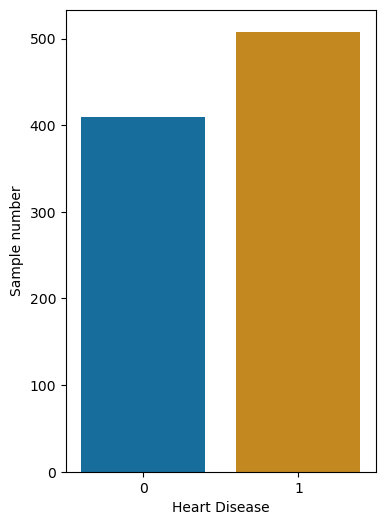

In [21]:
plt.figure(figsize=(4,6))
sns.countplot(data=df, x='HeartDisease', palette='colorblind')
plt.xlabel('Heart Disease')
plt.ylabel('Sample number')
plt.show()

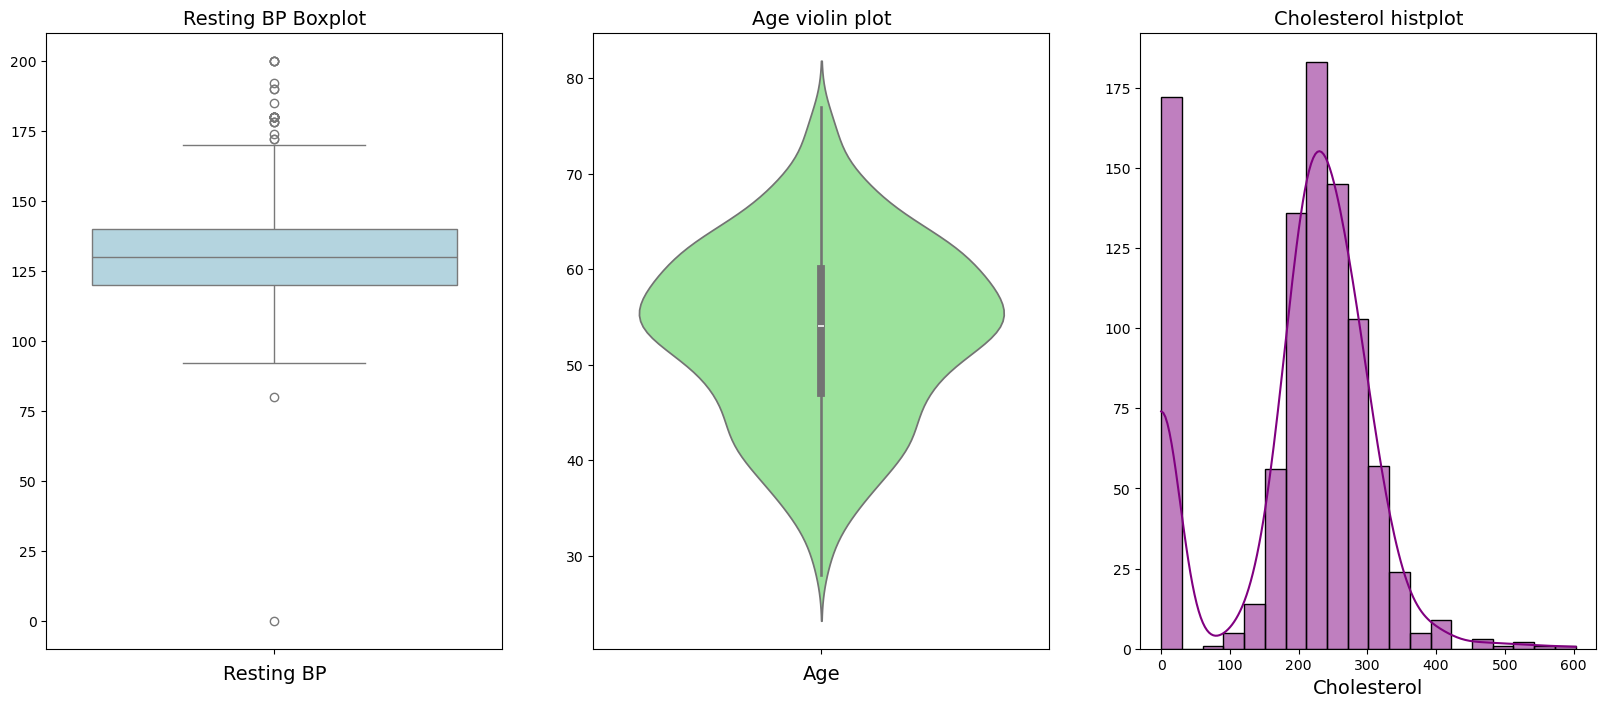

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(y=df['RestingBP'], color='lightblue')
plt.title('Resting BP Boxplot', fontsize=14)
plt.xlabel('Resting BP', fontsize=14)
plt.ylabel('')

plt.subplot(1,3,2)
sns.violinplot(y=df['Age'], color='lightgreen')
plt.title('Age violin plot', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('')

plt.subplot(1,3,3)
sns.histplot(df['Cholesterol'], kde=True, bins=20, color='purple')
plt.title('Cholesterol histplot', fontsize=14)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('')

plt.show()

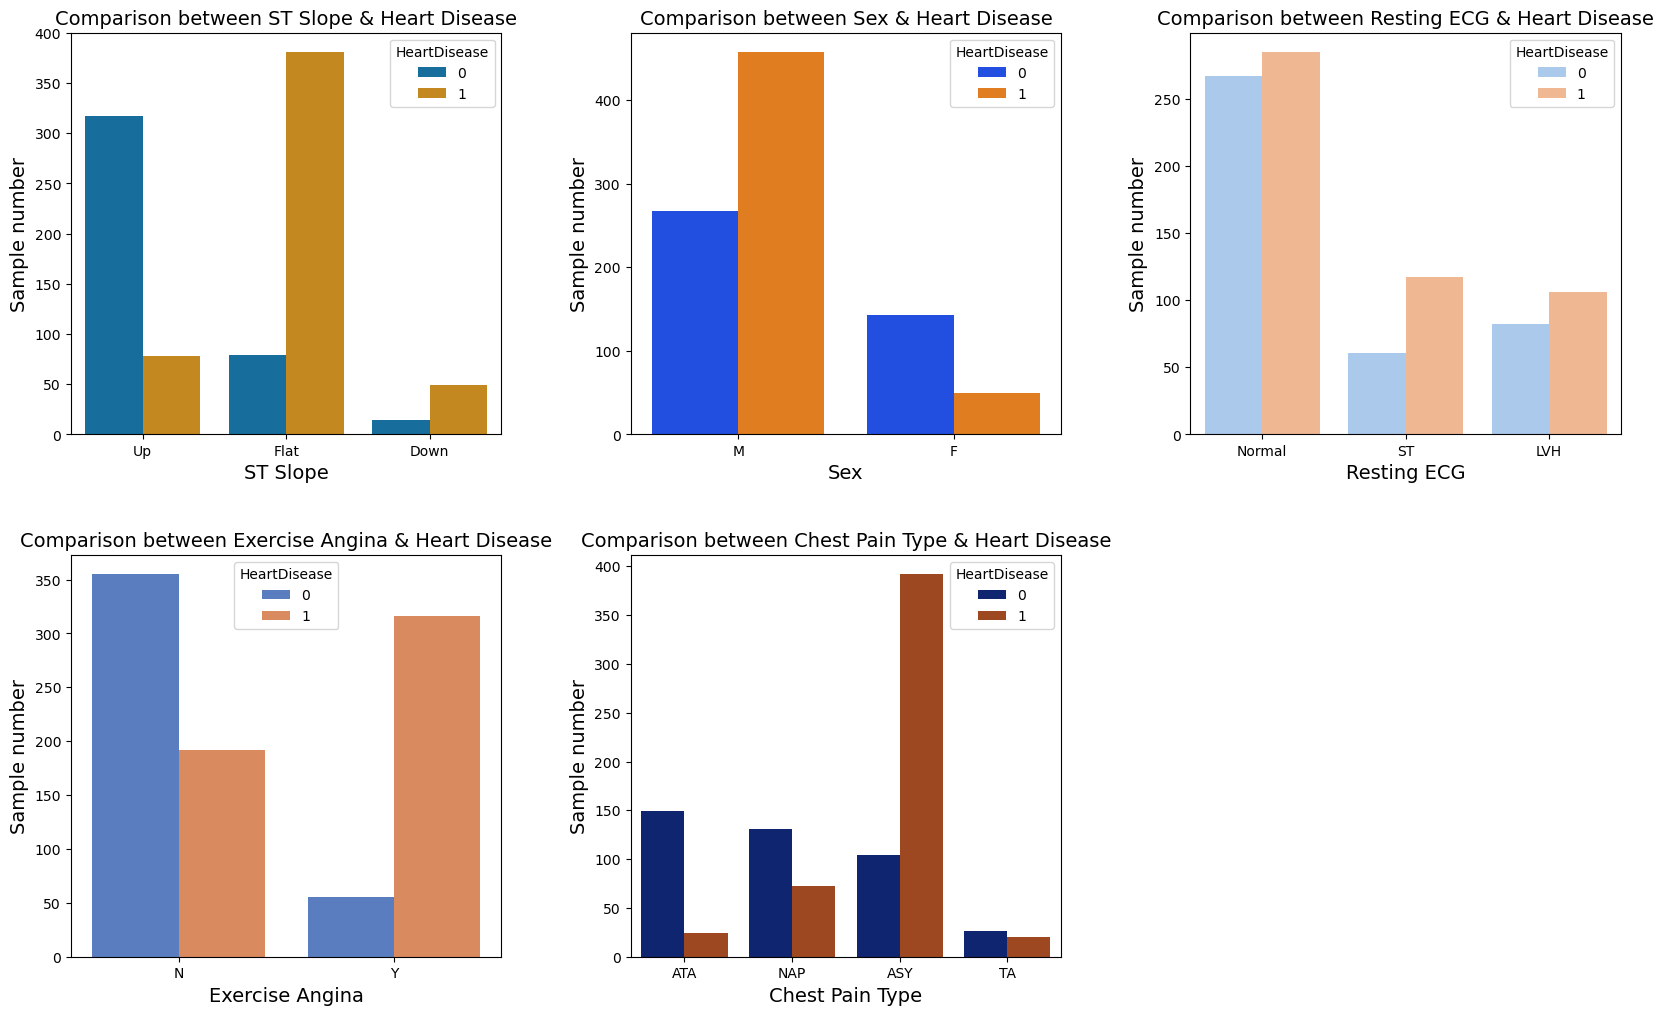

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', palette='colorblind')
plt.xlabel('ST Slope', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between ST Slope & Heart Disease', fontsize=14)

plt.subplot(2,3,2)
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='bright')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Sex & Heart Disease', fontsize=14)

plt.subplot(2,3,3)
sns.countplot(data=df, x='RestingECG', hue='HeartDisease', palette='pastel')
plt.xlabel('Resting ECG', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Resting ECG & Heart Disease', fontsize=14)

plt.subplot(2,3,4)
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', palette='muted')
plt.xlabel('Exercise Angina', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Exercise Angina & Heart Disease', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='dark')
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Chest Pain Type & Heart Disease', fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [3]:
sns.pairplot(df, hue='HeartDisease', markers=['o', 's'], palette='Set1')
plt.suptitle('Feature Relation Pairplot', y=1.02)
plt.show()

NameError: name 'sns' is not defined

## Feature Engineering

In [26]:
train_set, val_set, test_set = train_val_test_split(df)

In [27]:
X_train, y_train = remove_labels(train_set, 'HeartDisease')
X_val, y_val = remove_labels(val_set, 'HeartDisease')
X_test, y_test = remove_labels(test_set, 'HeartDisease')

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self._columns = None

    def fit(self, X, y=None):
        # Selecting Cat Columns
        X_cat = X.select_dtypes(include=['object', 'category'])
        # Adjusting OneHotEncoder & saving codified columns
        self._oh.fit(X_cat)
        self._columns = self._oh.get_feature_names_out(X_cat.columns)
        return self

    def transform(self, X, y=None):
        # Copying
        X_copy = X.copy()
        # Cat & Num Division
        X_cat = X_copy.select_dtypes(include=['object', 'category'])
        X_num = X_copy.select_dtypes(exclude=['object', 'category'])
        # Transforming Categories
        X_cat_oh = self._oh.transform(X_cat)
        # Convertir a DataFrame alineado
        X_cat_oh = pd.DataFrame(X_cat_oh, columns=self._columns, index=X_copy.index)
        # Combinar numéricas y categóricas codificadas
        return pd.concat([X_num, X_cat_oh], axis=1)


In [29]:
encoder = CustomOneHotEncoding()
encoder.fit(X_train)

CustomOneHotEncoding()

In [30]:
X_train_encoded = encoder.transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [31]:
X_train_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
462,59,122,233,0,117,1.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
433,46,110,236,0,125,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
163,42,120,196,0,150,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
248,45,130,219,0,130,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
582,69,122,216,1,84,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254,0,110,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,45,120,225,0,140,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
860,60,130,253,0,144,1.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
435,60,152,0,0,118,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
num_columns = X_train.select_dtypes(exclude='object')
num_columns.drop('FastingBS', axis=1, inplace=True)
num_columns = num_columns.columns

In [33]:
num_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [34]:
scaler = StandardScaler()

X_train_scaled = X_train_encoded.copy()
X_val_scaled = X_val_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[num_columns] = scaler.fit_transform(X_train_encoded[num_columns])
X_val_scaled[num_columns] = scaler.fit_transform(X_val_encoded[num_columns])
X_test_scaled[num_columns] = scaler.fit_transform(X_test_encoded[num_columns])

### Correlation Matrix

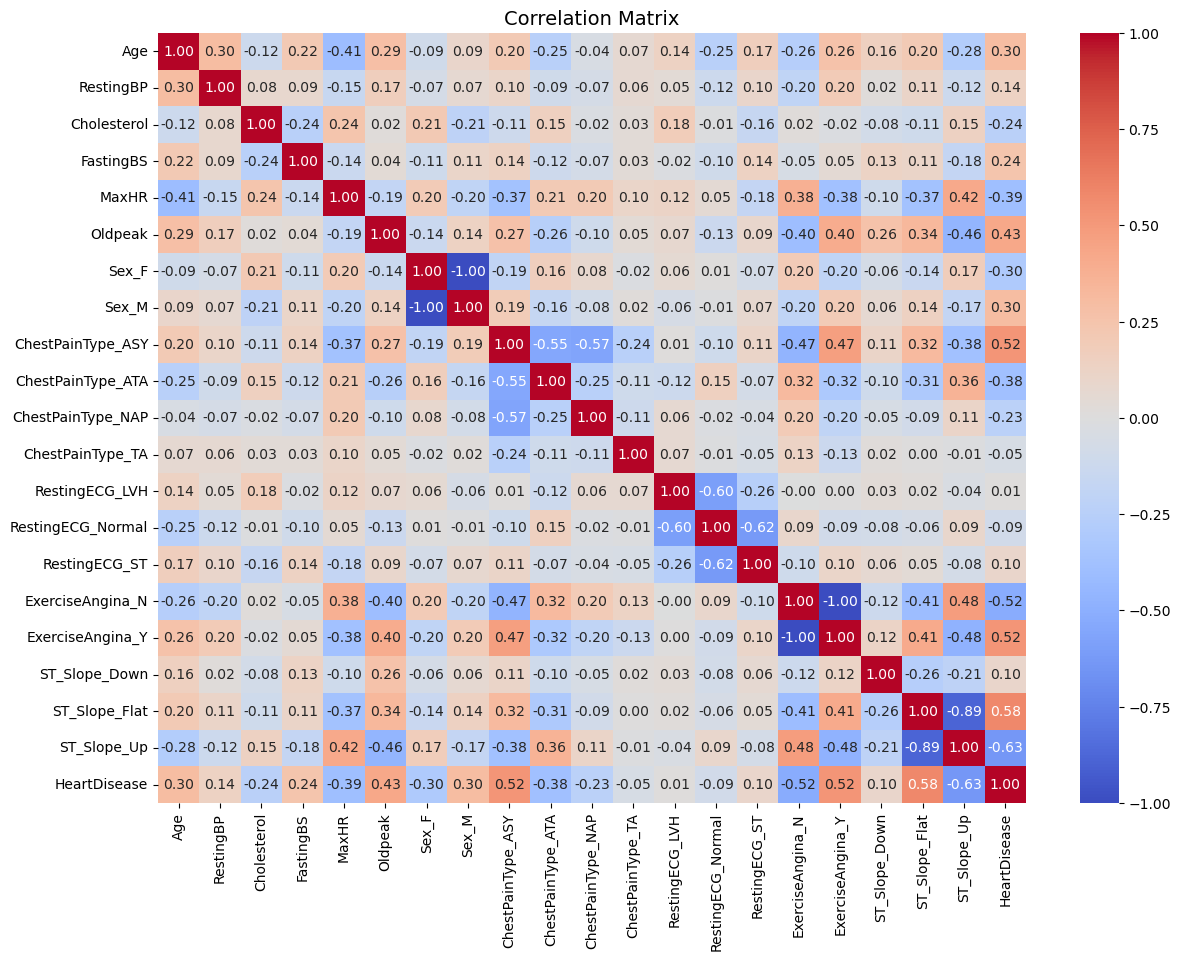

In [36]:
X_train_encoded["HeartDisease"] = y_train

corr_matrix = X_train_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()

X_train_encoded = X_train_encoded.drop("HeartDisease", axis=1)

## Model Selection

### Training

Let's try different models and use the f1 score metric to evaluate them.

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = lr_clf.predict(X_val_scaled)
print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.844407003413523


#### SVM

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=0.5, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

SVC(C=0.5)

In [44]:
y_pred = svm_clf.predict(X_val_scaled)
print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.8706501794974073


#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [47]:
y_pred = rf_clf.predict(X_val_scaled)
print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.8711112513409478


#### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train_encoded, y_train)

GaussianNB()

In [50]:
y_pred = gnb_clf.predict(X_val_encoded)
print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.8496297932311058


### Model improvement

SVM and Random Forest had the best results related to the f1 score metric. Let's go deeper for better results and a final model.

In [53]:
feature_names = X_train_scaled.columns
importances = rf_clf.feature_importances_

feature_importances = pd.DataFrame({'feature': feature_names,
                                    'importance': importances}).sort_values(by='importance', ascending=False)

feature_importances

,feature,importance
19,ST_Slope_Up,0.137267
5,Oldpeak,0.107927
18,ST_Slope_Flat,0.103710
2,Cholesterol,0.093727
4,MaxHR,0.085958
0,Age,0.077737
8,ChestPainType_ASY,0.074064
1,RestingBP,0.065521
16,ExerciseAngina_Y,0.059932
15,ExerciseAngina_N,0.059102


In [54]:
top_features = feature_importances.head(15)['feature'].tolist()
X_train_reduced = X_train_scaled[top_features]
X_val_reduced = X_val_scaled[top_features]
X_test_reduced = X_test_scaled[top_features]

In [91]:
top_features

['ST_Slope_Up',
 'Oldpeak',
 'ST_Slope_Flat',
 'Cholesterol',
 'MaxHR',
 'Age',
 'ChestPainType_ASY',
 'RestingBP',
 'ExerciseAngina_Y',
 'ExerciseAngina_N',
 'Sex_M',
 'ChestPainType_ATA',
 'Sex_F',
 'FastingBS',
 'ChestPainType_NAP']

In [55]:
X_train_reduced

,ST_Slope_Up,Oldpeak,ST_Slope_Flat,Cholesterol,MaxHR,Age,ChestPainType_ASY,RestingBP,ExerciseAngina_Y,ExerciseAngina_N,Sex_M,ChestPainType_ATA,Sex_F,FastingBS,ChestPainType_NAP
462,0.0,0.364049,0.0,0.299269,-0.829025,0.575079,1.0,-0.585246,1.0,0.0,1.0,0.0,0.0,0,0.0
433,0.0,1.004337,1.0,0.327451,-0.502520,-0.784199,1.0,-1.230308,1.0,0.0,1.0,0.0,0.0,0,0.0
163,1.0,-0.825056,0.0,-0.048321,0.517807,-1.202438,0.0,-0.692757,0.0,1.0,1.0,1.0,0.0,0,0.0
248,0.0,0.089640,1.0,0.167748,-0.298455,-0.888759,1.0,-0.155206,1.0,0.0,1.0,0.0,0.0,0,0.0
582,0.0,-0.825056,1.0,0.139565,-2.175856,1.620678,1.0,-0.585246,1.0,0.0,1.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.825056,0.0,0.496549,-1.114716,-0.575079,1.0,-0.692757,0.0,1.0,0.0,0.0,1.0,0,0.0
270,1.0,-0.825056,0.0,0.224114,0.109676,-0.888759,1.0,-0.692757,0.0,1.0,1.0,0.0,0.0,0,0.0
860,1.0,0.455519,0.0,0.487155,0.272928,0.679639,1.0,-0.155206,1.0,0.0,1.0,0.0,0.0,0,0.0
435,1.0,-0.825056,0.0,-1.889605,-0.788212,0.679639,1.0,1.027407,1.0,0.0,1.0,0.0,0.0,0,0.0


In [56]:
svm_clf = SVC(kernel='rbf', C=0.2, gamma='scale')
svm_clf.fit(X_train_reduced, y_train)
y_pred = svm_clf.predict(X_val_reduced)

print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.8759385247157611


In [57]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_reduced, y_train)
y_pred = rf_clf.predict(X_val_reduced)

print('F1 Score:', f1_score(y_val, y_pred, average='weighted'))

F1 Score: 0.8656819364057181


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.2, 0.5, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, 
                        scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_svm.fit(X_train_reduced, y_train)
print("Best Parameters SVM:", grid_svm.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [60]:
param_grid_rf = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, 
                       scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_reduced, y_train)
print("Best Parameters Random Forest:", grid_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


In [61]:
svm_adjusted = grid_svm.best_estimator_
rf_adjusted = grid_rf.best_estimator_

In [74]:
y_pred = svm_adjusted.predict(X_test_reduced)
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

y_pred = rf_adjusted.predict(X_test_reduced)
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.8968364426997628
F1 Score: 0.8804347826086957


### Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svm_scores = cross_val_score(svm_adjusted, X_train_reduced, y_train, cv=cv, scoring='f1')
rf_scores = cross_val_score(rf_adjusted, X_train_reduced, y_train, cv=cv, scoring='f1')

print("SVM: Mean F1-Score = {:.4f}, Standard deviation = {:.4f}".format(svm_scores.mean(), svm_scores.std()))
print("Random Forest: Mean F1-Score = {:.4f}, Standard deviation = {:.4f}".format(rf_scores.mean(), rf_scores.std()))

SVM: Mean F1-Score = 0.8710, Standard deviation = 0.0376
Random Forest: Mean F1-Score = 0.8655, Standard deviation = 0.0396


In general, SVM have achieved better and more solid results than Random Forest, so this will be the final model.

---------------------------------------------------------------------------

## Graphical Representations

### SVM Decision Boundary

C:\Users\David\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\David\AppData\Local\Temp\ipykernel_4956\683565509.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


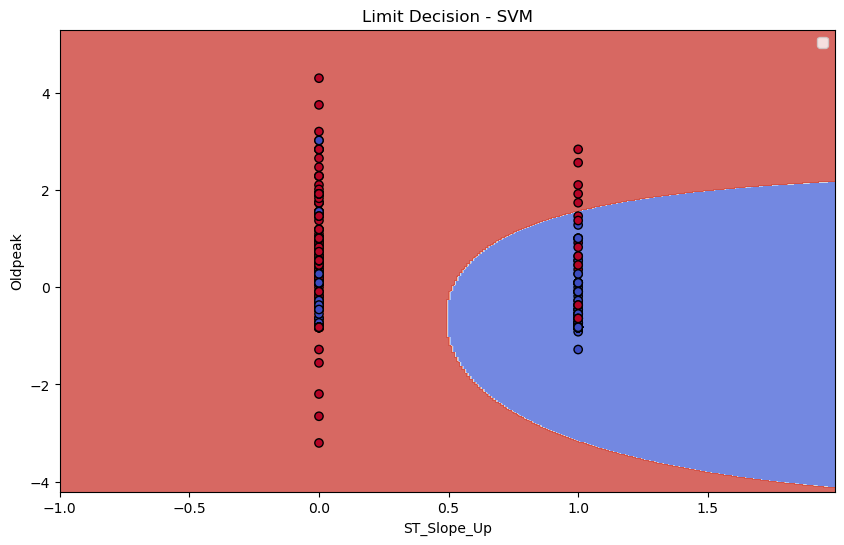

In [151]:
# Selecting the 2 most important features
top_2_features = feature_importances[:2].iloc[:, 0].tolist()
X_train_2d = X_train_reduced[top_2_features]
X_test_2d = X_test_reduced[top_2_features]

# Training again SVM with 2 features
svm_clf_2d = SVC(kernel='rbf', C=1, gamma=0.1)
svm_clf_2d.fit(X_train_2d, y_train)

# Decision boundary plot
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary - SVM")
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.show()

### Confusion Matrix

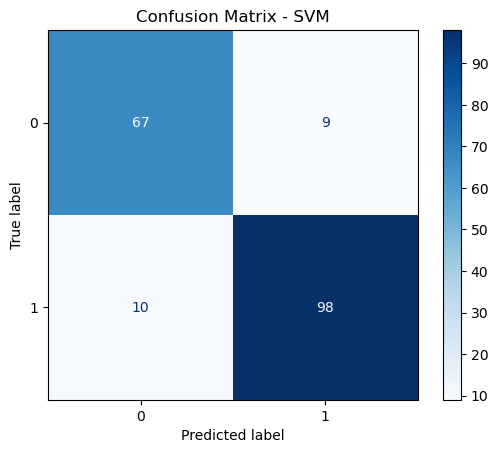

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = svm_adjusted.predict(X_test_reduced)

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_adjusted.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

### ROC & AUC Curve

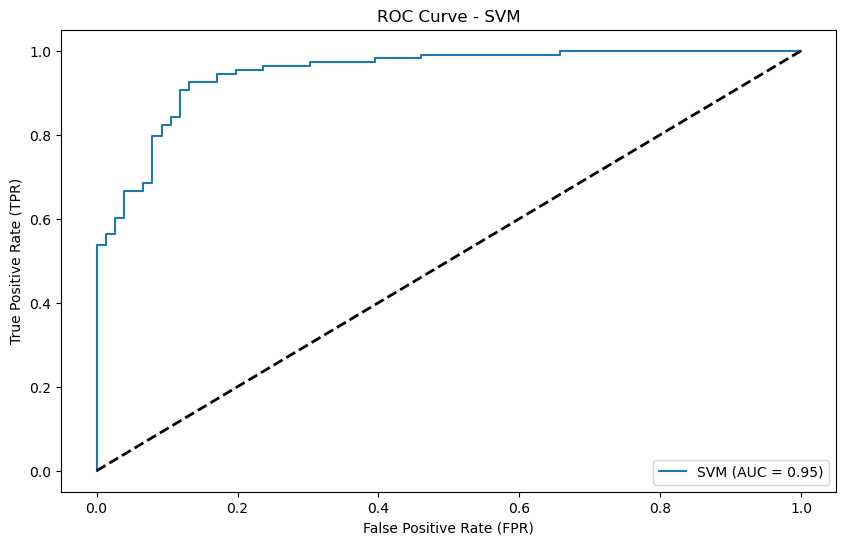

In [163]:
from sklearn.metrics import roc_curve, auc

y_scores = svm_adjusted.decision_function(X_test_reduced)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.show()

## Conclusion

After all this tests and visualizations, let's sum up:

#### **Objective**:

The objective was to predict the presence or absence of heart disease using Machine Learning models based on a small dataset of 918 examples.

#### **Main results**:

**Models tested**:
- SVM (rbf kernel) and Random Forest showed the best performance.
- Finally, SVM outperformed Random Forest with a mean F1-Score of 0.871 in cross-validation and 0.897 in the test set.

**Feature selection**:
Reduction to the 15 most important features, based on Random Forest, improved the overall performance of both models.

**Visualisations**:
- The decision boundary shows how the model discriminates between classes.
- The confusion matrix and ROC curve indicate that the model has a good balance between accuracy and recall.

**Final Choice**:
The SVM model, with the rbf kernel and the adjusted parameters, is a suitable solution to this problem. Although Random Forest offers interpretability, SVM provides a slight performance advantage.